In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Import the necessary packages and modules
import datetime, os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('./sci.mplstyle')
from tensorflow.keras import datasets, layers, models, losses

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
# Read MNIST dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print('Train shape:', x_train.shape)
print('Train samples:', x_train.shape[0])
print('Test samples:', x_test.shape[0], )
print('Image shape:', x_train[0].shape)

Train shape: (60000, 28, 28)
Train samples: 60000
Test samples: 10000
Image shape: (28, 28)


In [5]:
# Add pad to extend size for input matrix
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 36, 36])

In [6]:
# Add dimension for input matrix
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 36, 36, 1])

In [10]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]
x_train.shape

TensorShape([52000, 36, 36, 1])

In [11]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPool2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 5, activation='relu'))
model.add(layers.MaxPool2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 activation (Activation)     (None, 16, 16, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 6, 6, 16)          0

In [12]:
# Configures the CNN model for training
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
# Store log for TensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# Training the CNN model with the given inputs
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=15, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/15
813/813 [==============================] - 21s 25ms/step - loss: 0.8737 - accuracy: 0.7013 - val_loss: 0.3841 - val_accuracy: 0.8810
Epoch 2/15
813/813 [==============================] - 21s 26ms/step - loss: 0.2748 - accuracy: 0.9150 - val_loss: 0.2455 - val_accuracy: 0.9170
Epoch 3/15
813/813 [==============================] - 24s 30ms/step - loss: 0.1794 - accuracy: 0.9439 - val_loss: 0.1720 - val_accuracy: 0.9390
Epoch 4/15
813/813 [==============================] - 25s 30ms/step - loss: 0.1344 - accuracy: 0.9577 - val_loss: 0.1198 - val_accuracy: 0.9655
Epoch 5/15
813/813 [==============================] - 25s 30ms/step - loss: 0.1052 - accuracy: 0.9668 - val_loss: 0.0981 - val_accuracy: 0.9690
Epoch 6/15
813/813 [==============================] - 24s 30ms/step - loss: 0.0864 - accuracy: 0.9722 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 7/15
813/813 [==============================] - 24s 30ms/step - loss: 0.0740 - accuracy: 0.9762 - val_loss: 0.0820 - val_accuracy:

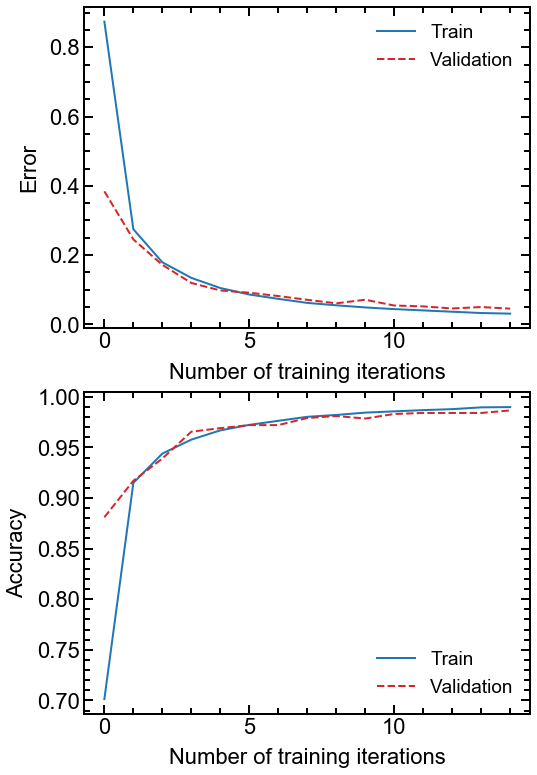

In [13]:
# Plot results with Matplotlib
fig, axs = plt.subplots(2, 1, figsize=(8,13))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'],ls='--')
axs[0].set_xlabel('Number of training iterations')
axs[0].set_ylabel('Error')
axs[0].legend(['Train', 'Validation'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'],ls='--')
axs[1].set_xlabel('Number of training iterations')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Validation'])

# Show figure
plt.savefig('LeNet5.png', format="png", dpi=600)
plt.show()

In [14]:
# Evaluating the already trained CNN model using the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0403 - accuracy: 0.9864


[0.04034523665904999, 0.9864000082015991]

In [16]:
# Show data with TensorBoard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 31954), started 0:18:02 ago. (Use '!kill 31954' to kill it.)